# MNIST 튜토리얼

In [4]:
# 라이브러리 호출
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist_train = dataset.MNIST(root='./MNIST_data',
                          train=True, 
                          transform=transforms.ToTensor(), 
                          download=True)

mnist_test = dataset.MNIST(root='./MNIST_data', 
                         train=False, 
                         transform=transforms.ToTensor(), 
                         download=True)

0.4%

100.0%


Extracting ./MNIST_data\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST_data\MNIST\raw



102.8%


Extracting ./MNIST_data\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST_data\MNIST\raw



100.0%


Extracting ./MNIST_data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST_data\MNIST\raw



112.7%

Extracting ./MNIST_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST_data\MNIST\raw



In [42]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST_data
    Split: Test
    StandardTransform
Transform: ToTensor()


5


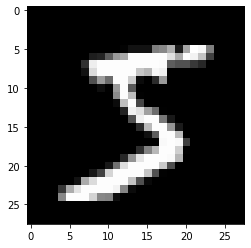

In [43]:
# sample
img, label = mnist_train[0]
plt.imshow(img[0,:,:],cmap='gray')
print(label)

In [53]:
# 상대적으로 쉬운 문제이므로 valid_dataset은 따로 상정X
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=32,shuffle=True,drop_last=False)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=32,shuffle=False,drop_last=False)

In [54]:
# Neural network 모델만들기
class MNIST_full(nn.Module):
    def __init__(self):
        super(MNIST_full,self).__init__()
        self.lin1 = nn.Linear(784,256)
        self.lin2 = nn.Linear(256,128)
        self.lin3 = nn.Linear(128,10)

    def forward(self,x):
        x = x.view(-1,784)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.softmax(self.lin3(x),dim=1)
        return x

In [75]:
model = MNIST_full()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [76]:
criterion = nn.CrossEntropyLoss()

In [77]:
for epoch in range(3):
    print(f'Epoch: {epoch+1}')  
    loss_buffer = []
    for idx,(x,y) in enumerate(train_loader):
        optimizer.zero_grad()    
        
        y_onehot = torch.zeros((y.shape[0],10))
        y_onehot[range(y.shape[0]),y]=1

        y_infer = model(x)
        loss = criterion(y_infer,y)
        loss.backward()
        optimizer.step()
        loss_buffer.append(loss.item())
        
        if idx % 300 == 0:
            print(f' Iteration:{idx}  Train loss {np.mean(loss_buffer):.3f}')

Epoch: 1
 Iteration:0  Train loss 2.302
 Iteration:300  Train loss 1.699
 Iteration:600  Train loss 1.630
 Iteration:900  Train loss 1.603
 Iteration:1200  Train loss 1.587
 Iteration:1500  Train loss 1.575
 Iteration:1800  Train loss 1.567
Epoch: 2
 Iteration:0  Train loss 1.491
 Iteration:300  Train loss 1.516
 Iteration:600  Train loss 1.515
 Iteration:900  Train loss 1.515
 Iteration:1200  Train loss 1.513
 Iteration:1500  Train loss 1.513
 Iteration:1800  Train loss 1.511
Epoch: 3
 Iteration:0  Train loss 1.485
 Iteration:300  Train loss 1.500
 Iteration:600  Train loss 1.503
 Iteration:900  Train loss 1.501
 Iteration:1200  Train loss 1.501
 Iteration:1500  Train loss 1.500
 Iteration:1800  Train loss 1.500


In [79]:
# Test 단계
acc = []
for x,y in test_loader:
    # one_hot encoding
    y_onehot = torch.zeros((len(y),10))
    y_onehot[range(len(y)),y]=1
    y_infer = model(x)

    correct_prediction = torch.argmax(y_infer, 1) == y
    acc.append(correct_prediction.float().mean())
    
print(f'Test loss {np.mean(loss_buffer):f}, Accuracy: {np.mean(acc)*100:f}%')

Test loss 1.499997, Accuracy: 96.016371%


In [1]:
# 실물샘플
img,label=random.choice(mnist_test)
plt.imshow(img[0,:,:],cmap='gray')
y_infer = model(img)
print(f'실제 이미지의 숫자 {label}')
print(f'예측 이미지의 숫자 {torch.argmax(y_infer,1)}')

NameError: name 'random' is not defined

In [72]:
data_batch, label_batch = next(iter(train_loader))
print(f'데이터 배치: {data_batch.shape}')
print(f'레이블 배치: {label_batch.shape}')

데이터 배치: torch.Size([32, 1, 28, 28])
레이블 배치: torch.Size([32])
